In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (GridSearchCV, KFold, RepeatedKFold,
                                     cross_val_score)
import graphviz
from sklearn import tree

In [2]:
# CEFR 1 — SUB decrease by 0.4 and more; SYN requires more than 0.9 increase or decrease of score
#   CEFR 2 — SUB decrease by 0.5 and more; SYN requires more than 0.9 increase or decrease in score
#   CEFR 3 — SUB decrease by 0.5 and more; requires more than 0.4 increase or decrease in score
#   CEFR 4 — SUB decrease by 0.6 and more; SYN requires more than 0.9 increase or decrease of score
#   CEFR 5 — SUB requires more than 0.8 increase or decrease in score; SYN requires more than 0.6 increase or decrease in score
# write a function based on above rule where input of the function is level and the score and the output is the result of the rule in form of 0 for no change and 1 for change

def cefr_rule_sub_fre(level, change_score):
    if level == 1:
        if change_score < - 0.2:
            return 1
        if change_score < 0.4:
            return 0
        else:
            return 1
    elif level == 2:
        if change_score < - 0.5:
            return 1
        if change_score < 0.4:
            return 0
        else:
            return 1
    elif level == 3:
        if change_score < 0.9:
            return 0
        else:
            return 1
    elif level == 4:
        if change_score < 0.8:
            return 0
        else:
            return 1
    elif level == 5:
        if abs(change_score) < 0.8:
            return 0
        else:
            return 1
    else:
        return -1

In [3]:
def cefr_rule_syn_fre(level, change_score):
    if level == 1:
        if 0 < change_score < 0.35:
            return 1
        elif change_score > 0.9:
            return 1
        else:
            return 0
    elif level == 2:
        if change_score > 0.9:
            return 1
        if -0.3 < change_score < 0:
            return 1
        else:
            return 0
    elif level == 3:
        if change_score > 0.7:
            return 1
        if change_score < -0.7:
            return 1
        else:
            return 0
    elif level == 4:
        if abs(change_score) > 1.2:
            return 1
        else:
            return 0
    elif level == 5:
        if 0.4 < abs(change_score) < 0.5:
            return 1
        if -0.6 < change_score < -0.7:
            return 1
        else:
            return 0

In [4]:
# \\ CLI \\
#   CEFR 1 — SUB requires an increase of 0.4 and more and a decrease of 0.9 and more ;
#   SYN requires more than 0.5 increase
#   CEFR 2 — SUB requires an increase of 0.4 and more and a decrease of 0.2 and more ;
#   SYN requires more than 0.7 increase and decrease by 0.3 and more
#   CEFR 3 — SUB requires an increase of 0.5 and more and a decrease of 0.2 and more ;
#   SYN requires more than 0.2 increase and decrease by 0.3 and more
#   CEFR 4 — SUB requires an increase and decrease of 1.0; SYN requires decrease by 0.8 and more
#   CEFR 5 — SUB requires a decrease of 0.3 and more; SYN requires decrease by 0.7 and more

def cefr_rule_sub_cli(level, change_score):
    if level == 1:
        if change_score < - 0.3:
            return 1
        elif abs(change_score) >= 0.9:
            return 1
        else:
            return 0
    elif level == 2:
        if abs(change_score) >= 0.4:
            return 1
        else:
            return 0
    elif level == 3:
        if change_score < -0.5:
            return 1
        elif change_score >= 0.4:
            return 1
        else:
            return 0
    elif level == 4:
        if abs(change_score) < 1.0:
            return 0
        else:
            return 1
    elif level == 5:
        if abs(change_score) < 1.2:
            return 0
        else:
            return 1
    else:
        return -1

In [5]:
def cefr_rule_syn_cli(level, change_score):
    if level == 1:
        if -0.6 < change_score < -0.4:
            return 1
        else:
            return 0
    elif level == 2:
        if 0.2 < change_score < 0.5:
            return 1
        elif abs(change_score) >= 1.5:
            return 1
        else:
            return 0
    elif level == 3:
        if change_score < -0.2:
            return 1
        else:
            return 0
    elif level == 4:
        if abs(change_score) > 0.9:
            return 1
        else:
            return 0
    elif level == 5:
        if 0.2 < abs(change_score) < 0.4:
            return 1
        else:
            return 0

In [4]:
df_traditional_scores = pd.read_csv('/cluster/work/sachan/abhinav/text_complexity/data/data_aug_with_label_readability_score_z.csv')


In [7]:
df_traditional_scores.columns.to_list()

['Unnamed: 0',
 'writing_id',
 'cefr_numeric',
 'sentences',
 'cefr_numeric_syn',
 'syn_aug',
 'cefr_numeric_sub',
 'sub_aug',
 'flesch_reading_ease_syn_z',
 'flesch_reading_ease_sub_z',
 'flesch_reading_ease_z',
 'flesch_kincaid_grade_z',
 'flesch_kincaid_grade_sub_z',
 'flesch_kincaid_grade_syn_z',
 'gunning_fog_index_z',
 'gunning_fog_index_sub_z',
 'gunning_fog_index_syn_z',
 'coleman_liau_index_z',
 'coleman_liau_index_sub_z',
 'coleman_liau_index_syn_z',
 'smog_index_z',
 'smog_index_sub_z',
 'smog_index_syn_z']

In [5]:
cols = ['writing_id', 'cefr_numeric', 'cefr_numeric_syn', 'cefr_numeric_sub', 'flesch_reading_ease_syn_z', 'flesch_reading_ease_sub_z',
        'flesch_reading_ease_z', 'coleman_liau_index_z','coleman_liau_index_sub_z','coleman_liau_index_syn_z']

df_traditional_scores = df_traditional_scores[cols]

In [35]:
X_train = pd.DataFrame()
X_train['cli_syn_diff'] = df_traditional_scores['coleman_liau_index_syn_z'] - df_traditional_scores['coleman_liau_index_z']
X_train['cefr_level'] = df_traditional_scores['cefr_numeric']

y_train = df_traditional_scores['cefr_numeric_syn'] - df_traditional_scores['cefr_numeric']
y_train[y_train == -1] = 0


In [36]:
y_train.value_counts()

0    73
1    27
Name: count, dtype: int64

In [46]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtree_model = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(dtree_model, X_train, y_train,
                         scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.643 (0.152)


In [44]:
model = dtree_model.fit(X_train, y_train)
model.classes_

array([0, 1])

In [47]:
from sklearn.metrics import mean_squared_error
# predict values for the train set
y_pred = model.predict(X_train)
y_pred = pd.Series(y_pred)
cefr_pred = y_pred + df_traditional_scores['cefr_numeric']
# calculate the rmse of the model
accuracy = mean_squared_error(df_traditional_scores['cefr_numeric_syn'], cefr_pred)
print(accuracy)

0.25


In [40]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=X_train.columns.to_list(),  
                                class_names=['no change in label', 'change in label'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="pdf")
graph.render("cli_syn_diff_render")

'cli_syn_diff_render.pdf'

In [5]:
fre_pred = []
cli_pred = []
for index, row in df_traditional_scores.iterrows():
    level = row['cefr_numeric']
    fre_sub = row['flesch_reading_ease_syn_z']
    fre_orig = row['flesch_reading_ease_z']
    change_score_fre  = fre_orig - fre_sub
    cli_sub = row['coleman_liau_index_syn_z']
    cli_orig = row['coleman_liau_index_z']
    change_score_cli = cli_orig - cli_sub
    fre_pred.append(cefr_rule_syn_fre(level, change_score_fre))
    cli_pred.append(cefr_rule_syn_cli(level, change_score_cli))

NameError: name 'cefr_rule_syn_fre' is not defined

In [38]:
sub_cefr = df_traditional_scores['cefr_numeric_syn']
orig_cefr = df_traditional_scores['cefr_numeric']
value_change_cefr = sub_cefr - orig_cefr
value_change_cefr[value_change_cefr == -1] = 0
print(value_change_cefr.value_counts())
print(value_change_cefr.values)

0    73
1    27
Name: count, dtype: int64
[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]


In [32]:
# get the accuracy of the model using sklearn compare the predicted values with the actual values in the dataset
fre_pred = np.array(fre_pred)
cli_pred = np.array(cli_pred)
from sklearn.metrics import accuracy_score
sub_cefr = df_traditional_scores['cefr_numeric_sub']
orig_cefr = df_traditional_scores['cefr_numeric']
value_change_cefr = sub_cefr - orig_cefr

fre_accuracy = accuracy_score(value_change_cefr, fre_pred)
cli_accuracy = accuracy_score(value_change_cefr, cli_pred)

print(fre_accuracy, cli_accuracy)

0.62 0.5


Text(50.722222222222214, 0.5, 'Actual Value')

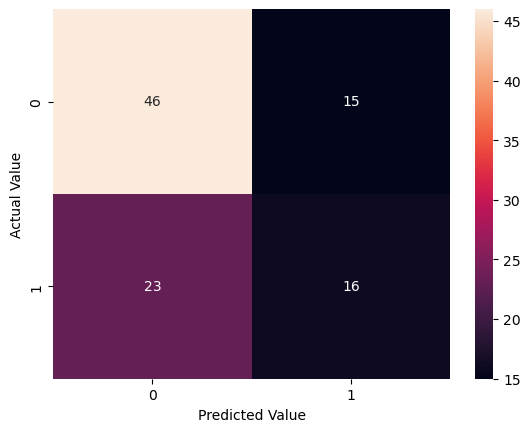

In [36]:
# draw heatmap to show the accuracy of the model and provide the labels for the axes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(value_change_cefr, fre_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
# plt.show()
# plt.savefig('/cluster/work/sachan/abhinav/text_complexity/result/cli_heatmap_syn.pdf')



In [33]:
print(cm)
# count number of 1 in fre_pred and cli_pred
print(np.count_nonzero(fre_pred))
print(np.count_nonzero(cli_pred))

[[41 20]
 [30  9]]
31
29


In [34]:
# take 20 values from fre_pred and value_change_cefr each time and five times and calculate the accuracy of the model
fre_accuracy = []
cli_accuracy = []
for i in range(5):
    fre_accuracy.append(accuracy_score(value_change_cefr[i * 20 :(i+1)*20], fre_pred[i * 20 :(i+1)*20]))
    cli_accuracy.append(accuracy_score(value_change_cefr[i * 20 :(i+1)*20], cli_pred[i * 20 :(i+1)*20]))

print(fre_accuracy)
print(cli_accuracy)

[0.5, 0.5, 0.65, 0.7, 0.75]
[0.3, 0.4, 0.45, 0.75, 0.6]
